# Finding the Best Markets to Advertise In

We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in. 



## Understanding the Data 

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a [popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [29]:
import pandas as pd
import numpy as np

direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'

survey = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning

# Quick exploration of the data
print(survey.shape)
pd.options.display.max_columns = 150 # to avoid truncated output 
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [30]:
survey.columns.values

array(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls',
       'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev',
       'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool',
       'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge',
       'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen',
       'CountryLive', 'EmploymentField', 'EmploymentFieldOther',
       'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning',
       'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther',
       'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x',
       'ID.y',

In [31]:
survey.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,133.0,132.0,544.0,547.0,481.0,1753.0,7200.000000,3833.000000,4508.000000,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,939.0,584.0,1691.0,6503.000000,16577.000000,17084.000000,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56169.169306,0.227498,0.572981,0.609383,0.420901,0.252463,0.854811,0.269970,0.075511,0.568416,166541.105033,15.609250,43169.357864,0.238083,0.024241,0.250609,0.434674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.771644,957.299753,20.790447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31602.625521,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74811.725422,0.419271,0.494700,0.487952,0.493720,0.434439,0.352302,0.443979,0.264223,0.495336,137761.450348,15.283681,61812.293272,0.425924,0.153802,0.433376,0.495741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419806,5003.003169,41.722826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39383.187732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

This data set has some information about the behaviours of the freecodecamp survey participats, their demographics, and what platforms they use to learn coding and what general areas they want to code in. 

The data can be downloaded from [2107 freecodecamp survey](https://github.com/freeCodeCamp/2017-new-coder-survey)

## Slide 3: Checking for Sample Representativity

Answering questions about a "population" of new codres.
First we need to find out if the sample we have is represntativ of the population 

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [32]:
##Generating a frequency  distribution table for JobRoleInterest column in percentages
import pprint

freq_table = survey['JobRoleInterest'].value_counts(normalize = True)*100

freq_table

Full-Stack Web Developer                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                   6.435927
  Data Scientist                                                                                                                            2.173913
Back-End Web Developer                                                                                                                      2.030892
  Mobile Developer                                                                                                                          1.673341
                                                                                                                                             ...    
  Front-End Web Developer,   Quality Assurance Engineer,   User Experience Designer, Full-Stack Web Develo

People can definitly be interested in more than one subject only 30% of the people are interested in one subject. 

Yes, it should be representative of a population


Full-Stack Web Developer                                                                                                                                                                      11.770595
Front-End Web Developer                                                                                                                                                                      6.435927
Back-End Web Developer                                                                                                                                                                         2.030892
Mobile Developer                                                                        1.673341%

The information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

- Split each string in the JobRoleInterest column to find the number of options for each participant.
    - We'll first drop the null values because we can't split Nan values.
- Generate a frequency table for the variable describing the number of options.

In [33]:
#Since the number of combinations is really high we need to split these:
    
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = survey['JobRoleInterest'].dropna() #dropping the non-numbered values
splitted_interests = interests_no_nulls.str.split(',') #splitting the various interests by ','

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
        ...    
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, Length: 13, dtype: float64

This means that only 32% of the people have chosen one option. Everyone else has chosen more than one option. 
It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [34]:
## need to find out who likes web development (all combinations) and Mobile Development

web_mobile_dev = interests_no_nulls.str.contains("Web Developer|Mobile Developer") #boolean array showing if it contains the strings or not

WMD_freq_table = web_mobile_dev.value_counts(normalize = True) * 100
print(WMD_freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


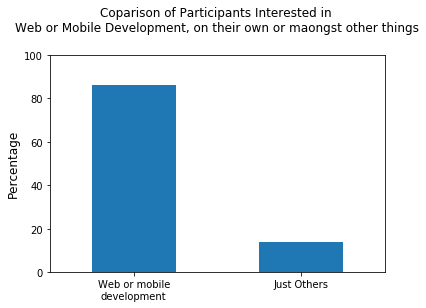

In [35]:

%matplotlib inline
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
WMD_freq_table.plot.bar()

plt.title('Coparison of Participants Interested in \nWeb or Mobile Development, on their own or maongst other things',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Just Others'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

As we can see in the graph above, the percetage of people who would like ot to Web and mobile app development or a combination of these (includes fornt end, back end and full stack) is more than 80%). This means that this sample is representativ eof out population of interest. And it also generally shows that we are on track for advertising in these two fields because most people want to have these types of skills. It has to be pointed ut that the 80+% is not representative of the whole survey, some pople may have not answered anything for that column (NaN). Thos epople have been removed already so we could do the calculation. 


It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

## Slide 4 New Coders - Locations and Densities


We will use the "interests_no_nulls" variable already made above, because we are not sure of what they want and that can affect our results. 
Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [36]:
df_interest_notnull = survey[survey['JobRoleInterest'].notnull()]

abs_freq_country = df_interest_notnull["CountryLive"].value_counts()
rel_freq_country = df_interest_notnull["CountryLive"].value_counts(normalize = True)*100

df2 = pd.DataFrame(data ={"abs_countries":abs_freq_country,"%relative_countries": rel_freq_country})

# print(abs_freq_country.head(10))
# print("\n")
# print(rel_freq_country.head(10))
df2


,abs_countries,%relative_countries
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Cuba,1,0.014624
Jordan,1,0.014624
Mozambique,1,0.014624
Anguilla,1,0.014624


Around 45% of the people who are interested in some sort of a job role are form the USA, the second country represented is India with 7.7% of the people. So if we were to advertise, we have to go to USA and India. 

We should go more in depth. We can look at age, or how much they have spent on learning coding or what they expect to get out of it in terms of renumeration.

## Slide 5 Spending Money for Learning

Need to find out the amoount money each student spends per month. 
Also, 4 countries (the top 4 form the previous list), and they all have Eglish. With that we have around 61% of the resondents who are interested in som eform of job role form the survey. Around 4100 people in total.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.
Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the `MonthsProgramming` column.

In [37]:
# Replace 0s with 1s to avoid division by 0
df_interest_notnull['MonthsProgramming'].replace(0,1, inplace = True)

#Do a division to find the value for the new clumn, we alreay replaced zeros with 1 to avoid inf values.
df_interest_notnull["AmountPerMonth"] = df_interest_notnull["MoneyForLearning"]/df_interest_notnull["MonthsProgramming"]

df_interest_notnull["AmountPerMonth"].isnull().sum() # There are 676 values that are null in this case

C:\Users\Ramin\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Ramin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


675

In [38]:
#Keep only the rows that don't have a null value for the Amount per month column.
df_interest_notnull2 = df_interest_notnull[df_interest_notnull["AmountPerMonth"].notnull()]

#Remove also any rows that have null values in the CountryLive column.

df_interest_notnull2 = df_interest_notnull2[df_interest_notnull2["CountryLive"].notnull()]

Grouped_country = df_interest_notnull2.groupby(["CountryLive"]).mean()

Top_4 = Grouped_country["AmountPerMonth"].loc[["Canada", "United States of America","India","United Kingdom"]]

Top_4


CountryLive
Canada                      113.510961
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Name: AmountPerMonth, dtype: float64

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the CountryLive column, and check out if we still have enough data for the four countries that interest us.

In [39]:
#As a summary metric, we recommend choosing the mean to take into account all values in
#the distributions. You can also compute the median or the mode to see how they compare with the mean.


Grouped_country

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,AmountPerMonth
CountryLive,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,18.750000,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,433500.000000,0.000,NaN,0.00,0.333333,0.500000,0.250000,0.000000,0.250000,1.000000,NaN,22.750000,NaN,0.750000,0.250000,0.0,1.000000,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,0.333333,0.000000,16.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
Albania,20.666667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28833.333333,0.000,NaN,0.00,0.000000,0.333333,0.833333,NaN,0.000000,NaN,NaN,19.333333,62400.0,0.000000,0.000000,0.0,1.000000,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.000000,252.000000,14.333333,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,7.111111
Algeria,23.750000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,26133.333333,NaN,NaN,NaN,0.000000,0.000000,0.250000,NaN,0.000000,NaN,NaN,15.750000,12000.0,0.000000,0.000000,0.0,0.000000,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.000000,0.000000,10.250000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.000000
Angola,20.000000,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,14400.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,6.000000,NaN,1.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.000000,700.000000,6.000000,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,116.666667
Anguilla,25.000000,NaN,NaN,N

In [40]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

Grouped_country.loc[["Canada", "United States of America","India","United Kingdom"]]

Top_4


CountryLive
Canada                      113.510961
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Name: AmountPerMonth, dtype: float64

We can see that UK and Canada are spending far less than India on avergae per mnth. This seems odd knowing the difference between the relative socio-economic situations of these countries. Canada and UK have a far higher anual GDP per capita than india. So we have to look deeper to mae sure we do not have any outliers skewing our results. 

## Slide 6 Dealing with Extreme Outliers


We will look for some extream ouliers on these values. The best tool for spotting outliers that I know of is a box plot, so lets plot the boxes. 

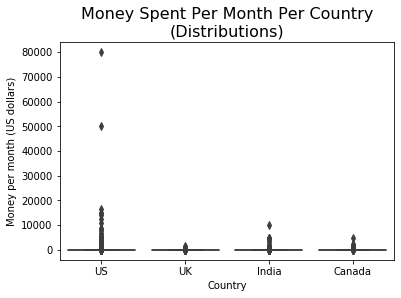

In [41]:
# Isolate only the countries of interest
only_4 = df_interest_notnull2[df_interest_notnull2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'AmountPerMonth', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [42]:
Set = df_interest_notnull2[df_interest_notnull2["CountryLive"].str.contains("United Kingdom|United States of America|India|Canada")]

Set_per_month = pd.DataFrame(data = {"CountryLive": Set["CountryLive"], "AmountPerMonth":Set["AmountPerMonth"]})

Set_per_month

,CountryLive,AmountPerMonth
1,United States of America,13.333333
2,United States of America,200.000000
6,United Kingdom,0.000000
15,United States of America,0.000000
16,United States of America,16.666667
...,...,...
18107,India,275.000000
18111,India,200.000000
18113,United States of America,0.000000
18130,United States of America,0.000000


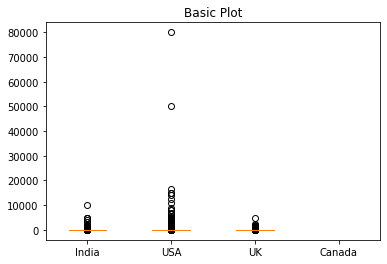

In [43]:
# plotting

India = Set_per_month[Set_per_month["CountryLive"]== "India"]['AmountPerMonth'].tolist()
USA =  Set_per_month[Set_per_month["CountryLive"]== "United States of America"]['AmountPerMonth'].tolist()
UK = Set_per_month[Set_per_month["CountryLive"]== "UK"]['AmountPerMonth'].tolist()
Canada = Set_per_month[Set_per_month["CountryLive"]== "Canada"]['AmountPerMonth'].tolist()


data1 = [India, USA, Canada, UK]

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data1)
lables = ['India','USA','UK','Canada']
ticks = [1,2,3,4]
ax1.set_xticks(ticks, minor=False)
ax1.set_xticklabels(lables, fontdict=None, minor=False)


plt.show()





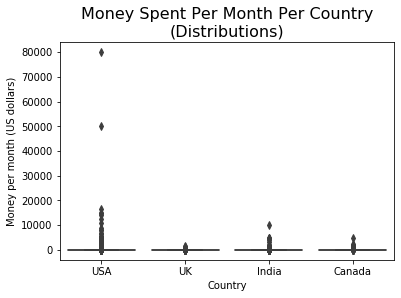

In [44]:
fig2, ax2 = plt.subplots()
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'AmountPerMonth', x = 'CountryLive',
            data = Set_per_month)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


So there are a few outliers who seemingly live in the USA and spend more than $20,000 per month on learning software whch is extreamply unlikely. So we eliminate those rows that have AmountPerMonth>= 20000.



In [45]:
Set = Set[Set["AmountPerMonth"]<= 8000] #The two USA people, they are not working and not looking for work!


Grouped_country = Set.groupby(["CountryLive"]).mean()
Top_4 = Grouped_country["AmountPerMonth"].loc[["Canada", "United States of America","India","United Kingdom"]]
Top_4

CountryLive
Canada                      113.510961
United States of America    152.434378
India                       113.748387
United Kingdom               45.534443
Name: AmountPerMonth, dtype: float64

In [46]:
Set[(Set["CountryLive"] == 'India') & (Set["AmountPerMonth"] >= 5000)] 

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,AmountPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Back-End Web Devel...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not listened to anything yet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN

People in India spending more than 5000 a month. There are 4 of them, but none of them have done bootcams, two single two married, 2 f them have been programming for one month, one for 2 months and the last one for 4 months. All have bachelors degrees in STEM. I will drop them because they dont look right.

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

Didn't attend bootcamps.
Had been programming for three months or less when at the time they completed the survey.

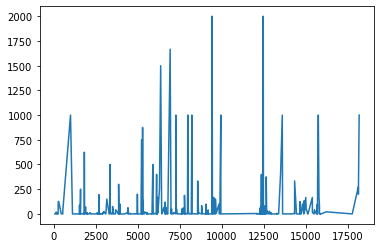

In [47]:
Set.drop(Set[(Set.CountryLive == 'India') & (Set.AmountPerMonth >= 3000)].index, inplace=True)

Set[Set.CountryLive=='India'].AmountPerMonth.plot() #checking to see if it has been eliminated

#checking to see the effect of this over the averages

# Grouped_country = Set.groupby(["CountryLive"]).mean()
# Top_4 = Grouped_country["AmountPerMonth"].loc[["Canada", "United States of America","India","United Kingdom"]]
# Top_4

In [48]:
#recomputing the mean values

Grouped_country = Set.groupby(["CountryLive"]).mean()
Top_4 = Grouped_country["AmountPerMonth"].loc[["Canada", "United States of America","India","United Kingdom"]]
Top_4

CountryLive
Canada                      113.510961
United States of America    152.434378
India                        65.758763
United Kingdom               45.534443
Name: AmountPerMonth, dtype: float64

India droped from 135 to 81 by eliminating those 4 outliers. So now we know we havw to look at USA and Canada. But my solution does not look like thiers. I have not eliminated as many outliers. I found out that I can play with the monthly pay threshold and then drop the outliers and I get similar numbers, its just a tuning game at this point. 


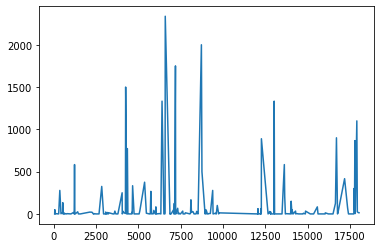

In [49]:
## Doing the Same for Canada to move my answers closer to the solution

Set.drop(Set[(Set.CountryLive == 'Canada') & (Set.AmountPerMonth >= 5000)].index, inplace=True)
Set[Set.CountryLive=='Canada'].AmountPerMonth.plot() #checking to see if it has been eliminated

In [50]:
#recomputing the mean values

Grouped_country = Set.groupby(["CountryLive"]).mean()
Top_4 = Grouped_country["AmountPerMonth"].loc[["Canada", "United States of America","India","United Kingdom"]]
Top_4

CountryLive
Canada                       93.065400
United States of America    152.434378
India                        65.758763
United Kingdom               45.534443
Name: AmountPerMonth, dtype: float64

These are suitably close to the solution's values. We have successfully elimitaed the extream outliers. To be honest I feel that the grouped box plot was not the best way to see the outliers, I prefer a normal plot. A habit I picked up from PhD days, and synchronisation algorithms.

## Slide 7 Choosing the Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $143).

We sell subscriptions at a price of $59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly $93 per month, compared to India ($66) and the United Kingdom ($45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average $66 each month.
We have almost twice as more potential customers in India than we have in Canada:


So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.
Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

In [51]:
Grouped_country_size = Set.groupby(["CountryLive"]).size()
Grouped_country_size

CountryLive
Canada                       239
India                        457
United Kingdom               279
United States of America    2924
dtype: int64

In [52]:
pd.DataFrame(data = {"market size": Grouped_country_size, 'spending_per_month': Top_4})

,market size,spending_per_month
Canada,239,93.065400
India,457,65.758763
United Kingdom,279,45.534443
United States of America,2924,152.434378


## Conclusion 


We are charging $59 per month for our product. the UK people on avergae are not paying that evem, so that is out of the question. The canadians are paying $93 per month on average but the size of the market is small. Indians are paying $63 which is more than what we are offering and the market size is double canada. I feel that India should be the second pick. 

An argument can be made to advertise only in the USa as the market size is 6 times India, I would do 10% of the budget in India and the rest in the USA. 

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.